In [124]:
import pandas as pd

In [125]:
df = pd.read_csv("diabetes.csv")

In [126]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [127]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [128]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [129]:
corr = df.corr()
corr['Outcome'].sort_values(ascending=True)

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

Text(0, 0.5, 'Count')

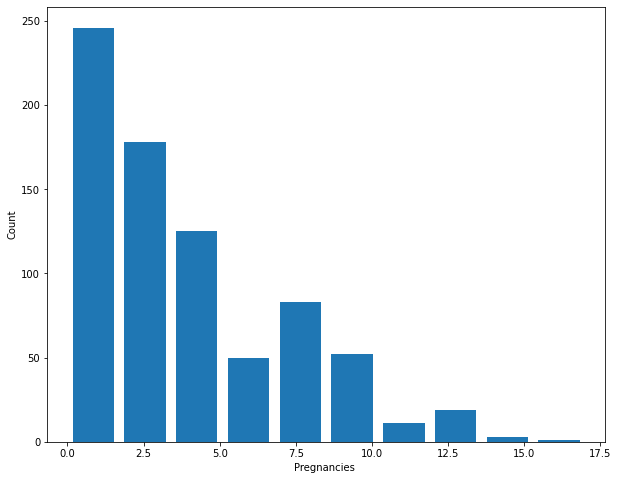

In [130]:
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rcParams["figure.figsize"] =(10,8)
plt.hist(df.Pregnancies, rwidth=0.8)
plt.xlabel("Pregnancies ")
plt.ylabel("Count")

In [131]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
71,5,139,64,35,140,28.6,0.411,26,0
477,7,114,76,17,110,23.8,0.466,31,0
379,0,93,100,39,72,43.4,1.021,35,0
275,2,100,70,52,57,40.5,0.677,25,0
737,8,65,72,23,0,32.0,0.600,42,0


In [132]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
items = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']

df[items] = scaler.fit_transform(df[items])

In [133]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.627,0.483333,1
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.351,0.166667,0
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.672,0.183333,1
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.167,0.000000,0
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,2.288,0.200000,1


In [134]:
df.BloodPressure[7]

0.0

In [135]:
df.BloodPressure[df.BloodPressure<=0].count()

35

In [136]:
import numpy as np

bp_mean = np.mean(df.BloodPressure)

df['BloodPressure'] = df['BloodPressure'].replace(0.0, bp_mean)
        

In [137]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
190,3,0.557789,0.508197,0.000000,0.000000,0.336811,0.142,0.000000,0
692,2,0.608040,0.573770,0.323232,0.112293,0.582712,0.886,0.033333,0
42,7,0.532663,0.754098,0.181818,0.000000,0.338301,0.235,0.450000,0
30,5,0.547739,0.614754,0.262626,0.000000,0.536513,0.546,0.650000,0
91,4,0.618090,0.655738,0.151515,0.208038,0.476900,0.443,0.216667,0


In [138]:
X = df.drop('Outcome', axis='columns')
y = df['Outcome']

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [142]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'DecisionTreeClassifier' : {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
        }
    }
}

In [143]:
from sklearn.model_selection import GridSearchCV

In [144]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'], cv=5, return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    
result = pd.DataFrame(scores, columns=['model','best_score','best_params'])
result

,model,best_score,best_params
0,svm,0.776097,"{'C': 10, 'kernel': 'rbf'}"
1,random_forest,0.748731,{'n_estimators': 10}
2,logistic_regression,0.766964,{'C': 10}
3,DecisionTreeClassifier,0.720194,{'criterion': 'gini'}


In [145]:
svc_clf = SVC(kernel='rbf', C=10)
svc_clf.fit(X_train,y_train)

SVC(C=10)

In [146]:
svc_clf.score(X_test,y_test)

0.7532467532467533

In [147]:
df.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
229,0,0.58794,0.655738,0.313131,0.062648,0.673621,0.089,0.05,0


In [148]:
svc_clf.predict([[4,0.65,0.757700,0.101010,0.09,0.43,0.485,0.20]])

C:\Users\Agni\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0], dtype=int64)